<img src="https://github.com/gantian127/pymt_nwis/blob/master/docs/_static/logo.png?raw=true" width='600' align='center'></a>

## Basic Info
This Jupyter Notebook was created by Tian Gan. You can run this Jupyter Notebook through [HydroShare](https://www.hydroshare.org/resource/1473ac1368b44808b57cca2848923779/).

If you have any question or suggestion to improve the current functions of the pymt_nwis package, please create a github issue [here](https://github.com/gantian127/pymt_nwis/issues).

Suggested citation: Gan, T. (2022). Jupyter Notebooks for the NWIS Data Component, HydroShare, https://www.hydroshare.org/resource/1473ac1368b44808b57cca2848923779/

## Introduction

[pymt_nwis](https://github.com/gantian127/pymt_nwis) is a package that uses the [bmi_nwis](https://github.com/gantian127/bmi_nwis) pacakge to convert NWIS datasets into a reusable, plug-and-play data component for [PyMT](https://pymt.readthedocs.io/en/latest/?badge=latest) modeling framework developed by Community Surface Dynamics Modeling System ([CSDMS](https://csdms.colorado.edu/wiki/Main_Page)). This allows NWIS datasets to be easily coupled with other datasets or models that expose a Basic Model Interface ([BMI](https://bmi-spec.readthedocs.io/en/latest/)).

### Install pymt
If you run this notebook on [HydroShare](https://www.hydroshare.org/resource/1473ac1368b44808b57cca2848923779/), please skip this step. Otherwise, please follow the [instructions](https://github.com/gantian127/pymt_nwis/blob/master/README.rst) to create a separate environment and install pymt.

### Install pymt_nwis

You can use the following command to install pymt_nwis:

In [ ]:
! pip install pymt_nwis

## Coding Examples

This section provides two examples to demonstrate how to use the [dataretrieval](https://github.com/USGS-python/dataretrieval) package and the pymt_nwis package to download the same NWIS dataset for visualization.

### Example 1: use dataretrieval package to download the NWIS data¶

In this example, get_record( ) function from the dataretrieval package is used to download the instantaneous datasets at the USGS Gage 03339000 from Jan 1st to 3rd, 2022. Time series plots of stream flow and gage height are created.

Text(0, 0.5, 'Gage height (ft)')

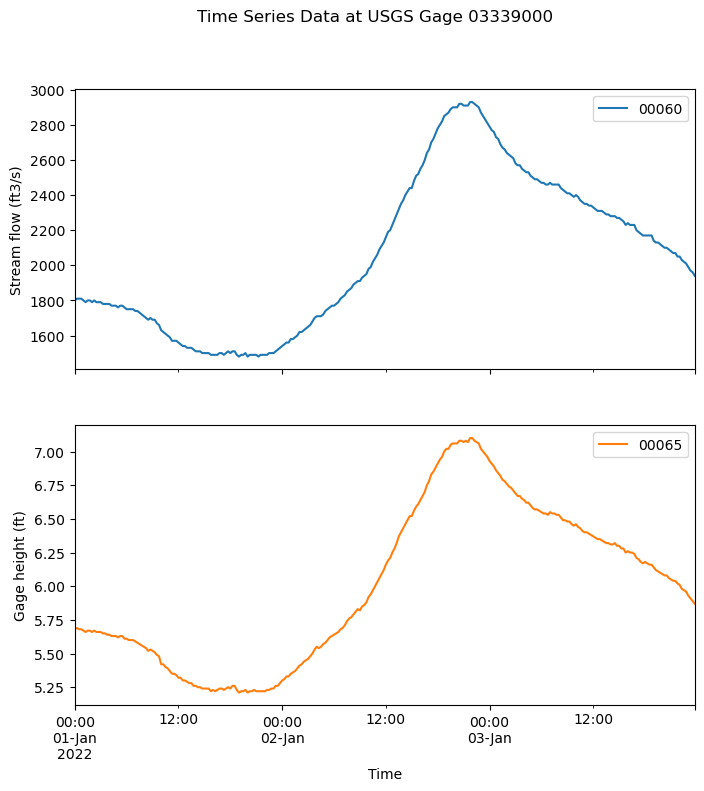

In [1]:
import dataretrieval.nwis as nwis                                 

# get data from NWIS
dataset = nwis.get_record(sites='03339000', service='iv', start='2022-01-01', end='2022-01-03')

# plot data
ax = dataset.plot(y=['00060','00065'], subplots=True, figsize=(8,8), 
                  xlabel='Time', title = 'Time Series Data at USGS Gage 03339000')
ax[0].set_ylabel('Stream flow (ft3/s)')
ax[1].set_ylabel('Gage height (ft)')

### Example 2: use pymt_nwis to download the NWIS data¶

Import Nwis class and instantiate it. A configuration file (yaml file) is required to provide the parameter settings for data download. An example [config_file.yaml](https://github.com/gantian127/pymt_nwis/blob/master/notebooks/config_file.yaml) is provided in the same folder with this Jupyter Notebook file. For more details of the parameters specified in the config.yaml file, please check with the link [here](https://bmi_nwis.readthedocs.io/en/latest/?badge=latest#parameter-settings).

In [2]:
import numpy as np
import cftime
import pandas as pd

from pymt.models import Nwis

# initiate a data component
data_comp = Nwis()
data_comp.initialize('config_file.yaml')

Use variable related methods to check the variable information of the NWIS data. You will find out that there are multiple variables for this dataset.

In [3]:
# get variable info
for var_name in data_comp.output_var_names:
    var_unit = data_comp.var_units(var_name)
    var_location = data_comp.var_location(var_name)
    var_type = data_comp.var_type(var_name)
    var_grid = data_comp.var_grid(var_name)
    var_itemsize = data_comp.var_itemsize(var_name)
    var_nbytes = data_comp.var_nbytes(var_name)

    print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {} \nvar_itemsize: {}'
        '\nvar_nbytes: {} \n'. format(var_name, var_unit, var_location, var_type, var_grid, var_itemsize, var_nbytes))

variable_name: Turbidity 
var_unit: FNU 
var_location: node 
var_type: float64 
var_grid: 0 
var_itemsize: 8
var_nbytes: 8 

variable_name: Inorganic nitrogen (nitrate and nitrite) 
var_unit: mg/l as N 
var_location: node 
var_type: float64 
var_grid: 0 
var_itemsize: 8
var_nbytes: 8 

variable_name: Height 
var_unit: ft 
var_location: node 
var_type: float64 
var_grid: 0 
var_itemsize: 8
var_nbytes: 8 

variable_name: Stream flow 
var_unit: ft3/s 
var_location: node 
var_type: float64 
var_grid: 0 
var_itemsize: 8
var_nbytes: 8 



Use time related methods to check the time information of the dataset. Please note that the time values are stored in a format which follows [CF convention](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.8/cf-conventions.pdf).

In [4]:
# get time info
start_time = data_comp.start_time
end_time = data_comp.end_time
time_step = data_comp.time_step
time_units = data_comp.time_units
time_steps = int((end_time - start_time)/time_step) + 1

print('start_time: {} \nend_time: {} \ntime_step: {} \ntime_units: {} \ntime_steps: {}'.format(
    start_time, end_time, time_step, time_units, time_steps))

start_time: 1641016800.0 
end_time: 1641275100.0 
time_step: 900.0 
time_units: seconds since 1970-01-01 00:00:00 UTC 
time_steps: 288


Use grid related methods to check the grid information of the NWIS dataset.

In [5]:
# get variable grid info
grid_type = data_comp.grid_type(var_grid)
grid_rank = data_comp.grid_ndim(var_grid)
grid_node_count = data_comp.grid_node_count(var_grid)
site_lon = data_comp.grid_x(var_grid)[0]
site_lat = data_comp.grid_y(var_grid)[0]

print('grid_type: {} \ngrid_rank: {} \ngrid_node_count: {} \nsite_lon: {} \nsite_lat: {}'.format(
    grid_type, grid_rank, grid_node_count, site_lon, site_lat))

grid_type: points 
grid_rank: 2 
grid_node_count: 1 
site_lon: -87.5972419 
site_lat: 40.10087009


Loop through each time step to get the stream flow, gage height and time values. get_value( ) method returns the stream flow (parameter code as 00060) and gage height (parameter code as 00065) values at each time step. update( ) method updates the current time step of the data component.

In [6]:
# initiate dataframe to store data
dataset = pd.DataFrame(columns = ['00060','00065','time'])

for i in range(0, time_steps):  
    # get values
    stream_flow = data_comp.get_value('Stream flow')
    gage_height = data_comp.get_value('Height')
    time = cftime.num2pydate(data_comp.time, time_units)
    
    # add new row to dataframe
    dataset.loc[len(dataset)]=[stream_flow[0], gage_height[0], time]
    
    # update to next time step
    data_comp.update()
    
# convert time to local time
dataset = dataset.set_index('time').tz_localize(tz='UTC').tz_convert(tz='US/Central')

Now let's make a plot of the stream flow and gage height data. 

Text(0, 0.5, 'Gage height (ft)')

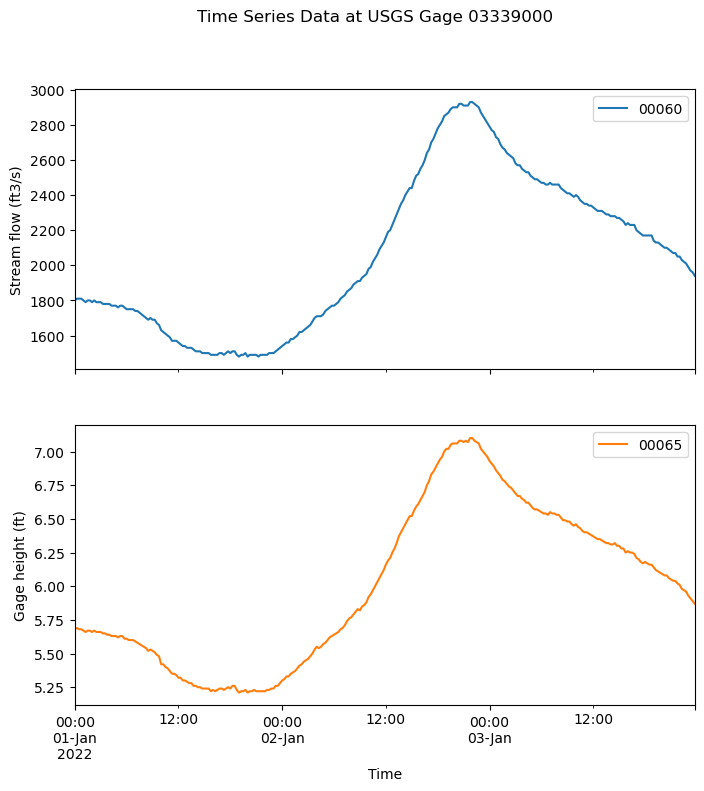

In [7]:
# plot data
ax = dataset.plot(y=['00060','00065'], subplots=True, figsize=(8,8), 
                  xlabel='Time', title = 'Time Series Data at USGS Gage 03339000')
ax[0].set_ylabel('Stream flow (ft3/s)')
ax[1].set_ylabel('Gage height (ft)')

Complete the example by finalizing the component. finalize( ) method performs tasks that take place after using the data component, such as deallocating memory and closing files.

In [8]:
data_comp.finalize()